<a href="https://colab.research.google.com/github/MikeChastain84/Mike_INFO5731_Fall2024/blob/main/Chastain_Mike_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


In [ ]:
# Start with mounting my drive and copying code to cleaned dataset in assignment 2
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# Write your code here
import pandas as pd
import numpy as np

# Set path to cleaned data set and print the head (first five rows) to inspect the data.
file_path = '/content/drive/MyDrive/Colab Notebooks/INFO 5731/Week 11/narrators_cleaned.csv'

data = pd.read_csv(file_path)
data.head()

,Narrator_Name,Bio,Clean_Bio,Non_Numbs,Non_StpWrds,LwrCs_Txt,Txt_Stem,Txt_Lemm
0,Kay Aiko Abe,"Nisei female. Born May 9, 1927, in Selleck, Wa...",Nisei female Born May 9 1927 in Selleck Washin...,Nisei female Born May in Selleck Washington ...,Nisei female Born May Selleck Washington Spent...,nisei female born may selleck washington spent...,nisei femal born may selleck washington spent ...,nisei female born may selleck washington spent...
1,Art Abe,"Nisei male. Born June 12, 1921, in Seattle, Wa...",Nisei male Born June 12 1921 in Seattle Washin...,Nisei male Born June in Seattle Washington G...,Nisei male Born June Seattle Washington Grew a...,nisei male born june seattle washington grew a...,nisei male born june seattl washington grew ar...,nisei male born june seattle washington grew a...
2,Sharon Tanagi Aburano,"Nisei female. Born October 31, 1925, in Seattl...",Nisei female Born October 31 1925 in Seattle W...,Nisei female Born October in Seattle Washing...,Nisei female Born October Seattle Washington F...,nisei female born october seattle washington f...,nisei femal born octob seattl washington famil...,nisei female born october seattle washington f...
3,Toshiko Aiboshi,"Nisei female. Born July 8, 1928, in Boyle Heig...",Nisei female Born July 8 1928 in Boyle Heights...,Nisei female Born July in Boyle Heights Cali...,Nisei female Born July Boyle Heights Californi...,nisei female born july boyle heights californi...,nisei femal born juli boyl height california e...,nisei female born july boyle height california...
4,Douglas L. Aihara,"Sansei male. Born March 15, 1950, in Torrance,...",Sansei male Born March 15 1950 in Torrance Cal...,Sansei male Born March in Torrance Californi...,Sansei male Born March Torrance California Gre...,sansei male born march torrance california gre...,sansei male born march torranc california grew...,sansei male born march torrance california gre...


In [ ]:
# Question 1, part (1):
# Based on the output above, we will use the LwrCs_Txt column to count N-grams with N=3.
# I can't tell if I'm supposed to count all N-grams where N=3 or include unigrams and bigrams.
# Based on the requirements for part (2), we will include bigrams and unigrams.

# Function for counting unigrams, bigrams, and trigrams without using pre-existing libraries.
def count_ngrams(text_series):
    unigram_counts = {}
    bigram_counts = {}
    trigram_counts = {}

    for review in text_series.dropna():
        words = review.split()

        # Count unigrams
        for word in words:
            if word in unigram_counts:
                unigram_counts[word] += 1
            else:
                unigram_counts[word] = 1

        # Count bigrams
        for i in range(len(words) - 1):
            bigram = (words[i], words[i+1])
            if bigram in bigram_counts:
                bigram_counts[bigram] += 1
            else:
                bigram_counts[bigram] = 1

        # Count trigrams
        for i in range(len(words) - 2):
            trigram = (words[i], words[i+1], words[i+2])
            if trigram in trigram_counts:
                trigram_counts[trigram] += 1
            else:
                trigram_counts[trigram] = 1

    return unigram_counts, bigram_counts, trigram_counts

# Call the function on the dataset
unigram_counts, bigram_counts, trigram_counts = count_ngrams(data['LwrCs_Txt'])

# Colab has been crashing because of memory issues. Because of that I'm only going to print the top 10 results for each N-gram.

print("Top 10 Unigrams:", sorted(unigram_counts.items(), key=lambda x: x[1], reverse=True)[:10])
print("Top 10 Bigrams:", sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)[:10])
print("Top 10 Trigrams:", sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)[:10])


Top 10 Unigrams: [('california', 1330), ('camp', 1324), ('war', 977), ('born', 947), ('concentration', 796), ('nisei', 738), ('world', 644), ('ii', 643), ('male', 524), ('washington', 521)]
Top 10 Bigrams: [(('concentration', 'camp'), 776), (('war', 'ii'), 642), (('world', 'war'), 639), (('male', 'born'), 490), (('assembly', 'center'), 418), (('nisei', 'male'), 394), (('female', 'born'), 388), (('nisei', 'female'), 299), (('los', 'angeles'), 293), (('ii', 'removed'), 284)]
Top 10 Trigrams: [(('world', 'war', 'ii'), 639), (('nisei', 'male', 'born'), 381), (('nisei', 'female', 'born'), 290), (('war', 'ii', 'removed'), 284), (('concentration', 'camp', 'california'), 260), (('assembly', 'center', 'california'), 222), (('minidoka', 'concentration', 'camp'), 185), (('concentration', 'camp', 'idaho'), 178), (('bombing', 'pearl', 'harbor'), 156), (('manzanar', 'concentration', 'camp'), 148)]


In [ ]:
#Question 1, part (2)

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(unigram_counts, bigram_counts):
    bigram_probabilities = {}  # Initialize a dictionary to store bigram probabilities

    for (w1, w2), bigram_count in bigram_counts.items():  # Loop through each bigram and its count
        if unigram_counts[w1] > 0:  # Ensure we don't divide by zero when calculating probabilities
            probability = bigram_count / unigram_counts[w1]  # Calculate probability for bigram (w1, w2)
            bigram_probabilities[(w1, w2)] = probability  # Store the calculated probability in the dictionary

    return bigram_probabilities  # Return the dictionary with bigram probabilities

# Calculate bigram probabilities using unigram and bigram counts from Part (1)
bigram_probabilities = calculate_bigram_probabilities(unigram_counts, bigram_counts)

# Print out the top 10 bigram probabilities to avoid too much output
print("Top 10 Bigram Probabilities:")
for bigram, prob in sorted(bigram_probabilities.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"Bigram: {bigram}, Probability: {prob}")

Top 10 Bigram Probabilities:
Bigram: ('beaverton', 'oregon'), Probability: 1.0
Bigram: ('conversion', 'christianity'), Probability: 1.0
Bigram: ('assembly', 'center'), Probability: 1.0
Bigram: ('homeless', 'seattle'), Probability: 1.0
Bigram: ('tragic', 'loss'), Probability: 1.0
Bigram: ('collecting', 'wood'), Probability: 1.0
Bigram: ('wood', 'perished'), Probability: 1.0
Bigram: ('elements', 'volunteered'), Probability: 1.0
Bigram: ('signal', 'corps'), Probability: 1.0
Bigram: ('aeronautics', 'administration'), Probability: 1.0


In [ ]:
# Question 1, part (3):
"""
This part has crashed on me many times. I have had to delete my entire colab file three times and start over. For that reason, I am not running the code.
I believe the code would work, but I need more resources.
"""
# Function to extract noun phrases by treating sequences of capitalized words as noun phrases
def extract_noun_phrases(text):
    words = text.split()  # Split text into individual words
    noun_phrases = []     # List to store extracted noun phrases
    current_phrase = []    # Temporary list to build a phrase from consecutive capitalized words

    # Iterate through each word in the text
    for word in words:
        if word[0].isupper():  # Check if the word starts with a capital letter
            current_phrase.append(word)  # Add capitalized word to the current phrase
        else:
            # If current phrase has 2+ words, treat it as a noun phrase
            if len(current_phrase) > 1:
                noun_phrases.append(" ".join(current_phrase))  # Join words and add to noun phrases list
            current_phrase = []  # Reset current phrase for the next sequence

    # Add the last phrase if it's valid (2+ words)
    if len(current_phrase) > 1:
        noun_phrases.append(" ".join(current_phrase))

    return noun_phrases  # Return the list of noun phrases found in the text

# Initialize dictionaries to track max frequency and store each review's noun phrase counts
max_noun_phrase_freq = {}  # Dictionary to store max frequency of each noun phrase across all reviews
review_noun_phrases = []   # List to store noun phrase frequencies per review

# Step 1: Loop through each review to extract noun phrases and count their frequencies
for review in data['Non_StpWrds'].dropna():
    phrases = extract_noun_phrases(review)  # Extract noun phrases from the review
    phrase_counts = {}  # Dictionary to count occurrences of each noun phrase in the current review

    # Count the frequency of each noun phrase in this review
    for phrase in phrases:
        # Increment phrase count in the current review
        phrase_counts[phrase] = phrase_counts.get(phrase, 0) + 1
        # Update the maximum frequency of this phrase across all reviews
        max_noun_phrase_freq[phrase] = max(max_noun_phrase_freq.get(phrase, 0), phrase_counts[phrase])

    review_noun_phrases.append(phrase_counts)  # Add this review's phrase counts to the list

# Step 2: Calculate relative probabilities for each noun phrase in each review
relative_probabilities = {}  # Dictionary to store relative probabilities by review

# Loop through each review's phrase counts to calculate relative probabilities
for i, phrase_counts in enumerate(review_noun_phrases):
    review_probs = {}  # Dictionary to store relative probability for each phrase in this review

    # Calculate relative probability for each noun phrase in the review
    for phrase, count in phrase_counts.items():
        relative_prob = count / max_noun_phrase_freq[phrase]  # Relative probability calculation
        review_probs[phrase] = relative_prob  # Store in dictionary for the current review

    relative_probabilities[f"Review_{i+1}"] = review_probs  # Store probabilities with review identifier

# Step 3: Display the result as a table
print("Relative Probability Table:")
print("Review\t", "\t".join(max_noun_phrase_freq.keys()))
for review, probs in relative_probabilities.items():
    # Create a row for each review with probabilities for all noun phrases
    row = [f"{probs.get(phrase, 0):.2f}" for phrase in max_noun_phrase_freq.keys()]
    print(f"{review}\t" + "\t".join(row))

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [15]:
# Write your code here

# Question 2, Part (1) - Build TF-IDF Matrix

# Step 1: Extract documents as a list and build vocabulary
documents = data['LwrCs_Txt'].dropna().tolist()  # Collect non-empty documents from 'LwrCs_Txt'
all_words = set()  # Initialize a set to store unique words

# Loop through each document to populate vocabulary
for doc in documents:
    for word in doc.split():
        all_words.add(word)  # Add each word to the vocabulary

vocab = list(all_words)  # Convert the set to a list for consistent ordering
vocab_index = {word: idx for idx, word in enumerate(vocab)}  # Map each word to an index

# Step 2: Calculate Term Frequency (TF) for each document
tf_matrix = np.zeros((len(documents), len(vocab)))  # Initialize the TF matrix

# Populate the TF matrix by counting word occurrences
for doc_idx, doc in enumerate(documents):
    words = doc.split()
    for word in words:
        if word in vocab_index:  # Check if word is in vocabulary
            word_idx = vocab_index[word]
            tf_matrix[doc_idx, word_idx] += 1  # Increment the count in the matrix

# Step 3: Calculate Document Frequency (DF) for each word in the vocabulary
df = np.zeros(len(vocab))  # Initialize a document frequency array

# Count how many documents contain each word
for word_idx in range(len(vocab)):
    for doc_idx in range(len(documents)):
        if tf_matrix[doc_idx, word_idx] > 0:
            df[word_idx] += 1

# Step 4: Calculate Inverse Document Frequency (IDF)
idf = np.log(len(documents) / (df + 1))  # Adding 1 to avoid division by zero issues

# Step 5: Compute the TF-IDF Matrix
tf_idf_matrix = tf_matrix * idf  # Calculate TF-IDF by multiplying TF and IDF element-wise

# Part (2) - Ranking Documents by Cosine Similarity

# Define a custom query
query = "A movie with an impressive performance and exciting plot"
query_words = query.lower().split()  # Preprocess query: lowercase and split into words

# Step 1: Create the Term Frequency (TF) vector for the query
query_tf = np.zeros(len(vocab))  # Initialize TF vector for the query

# Populate the TF vector for the query
for word in query_words:
    if word in vocab_index:
        word_idx = vocab_index[word]
        query_tf[word_idx] += 1  # Count each word in the query

# Step 2: Calculate the TF-IDF vector for the query by applying IDF
query_tf_idf = query_tf * idf  # Multiply query TF by IDF for each word

# Step 3: Define a function to calculate cosine similarity
def cosine_similarity(doc_vector, query_vector):
    # Calculate the dot product of document and query vectors
    dot_product = np.dot(doc_vector, query_vector)
    # Calculate norms for each vector
    norm_doc = np.linalg.norm(doc_vector)
    norm_query = np.linalg.norm(query_vector)
    # Compute cosine similarity (handle zero division)
    return dot_product / (norm_doc * norm_query) if norm_doc != 0 and norm_query != 0 else 0

# Calculate similarity between each document and the query
similarity_scores = [cosine_similarity(doc_vector, query_tf_idf) for doc_vector in tf_idf_matrix]

# Step 4: Rank Documents by Similarity Scores
# Sort indices by similarity scores in descending order
ranked_doc_indices = np.argsort(similarity_scores)[::-1]
top_n = 5  # Display the top 5 most relevant documents

# Print top-ranked documents with their similarity scores
print("Top documents by relevance to the query:")
for i in range(top_n):
    doc_idx = ranked_doc_indices[i]
    print(f"Document {doc_idx+1} - Similarity: {similarity_scores[doc_idx]:.4f}")

Top documents by relevance to the query:
Document 37 - Similarity: 0.2004
Document 686 - Similarity: 0.1540
Document 812 - Similarity: 0.1309
Document 677 - Similarity: 0.1117
Document 729 - Similarity: 0.0456


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

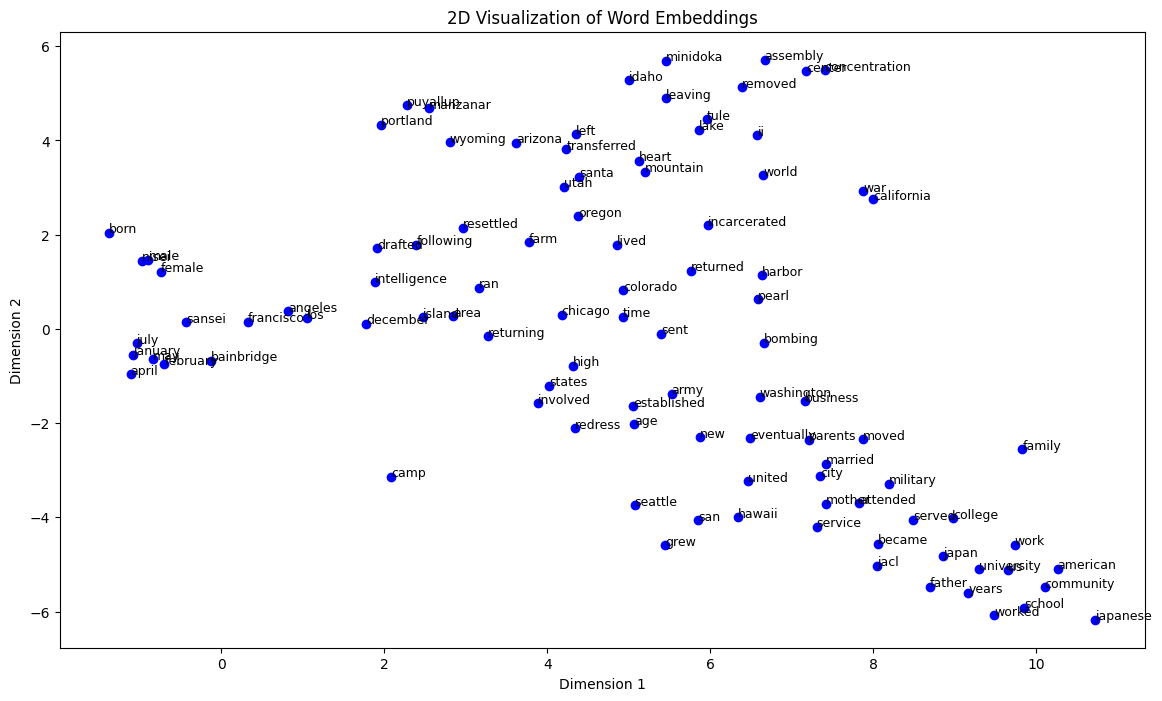

In [25]:
# Write your code here
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Question 3, Part (1) - Train a 300-dimension word embedding, using Word2Vec

# Using 'LwrCs_Txt' which contains preprocessed text data
documents = data['LwrCs_Txt'].dropna().tolist()  # Convert non-empty entries to a list
word_sentences = [doc.split() for doc in documents]  # Split each document into words (tokenized)

# Train the Word2Vec model with chosen parameters
model = Word2Vec(
    sentences=word_sentences,  # Input sentences
    vector_size=300,  # Dimensionality of the word vectors
    window=5,  # Context window size
    min_count=1,  # Minimum frequency for words to be included
    workers=4  # Number of worker threads to train the model
)

# Save the trained model to a file for reuse
model.save("word2vec_model.model")  # Save the model

# Question 3, Part (2) - Visualizing the word embedding model

# Load the trained Word2Vec model
model = Word2Vec.load("word2vec_model.model")

# Select a subset of words for visualization (e.g., the first 100 words by frequency)
words = list(model.wv.index_to_key)[:100]  # Adjust this number as needed
word_vectors = [model.wv[word] for word in words]  # Get vectors for the selected words

# Convert word vectors to a NumPy array
word_vectors_np = np.array(word_vectors)

# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors_np)

# Plot the words
plt.figure(figsize=(14, 8))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1], color='blue')
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=9)
plt.title('2D Visualization of Word Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# This question confused me. I didn't collect movie or product reviews. None of the questions above explicitly stated to do that.
# I am using a dataset regarding Densho Digital Repository authors. Also, I can't manually assign sentiment to 990+ entries, so I did the first 20.
# If I need to update this with a sentiment review for each entry before Assignment 4, I will.

# The GitHub link of your final csv file
https://github.com/MikeChastain84/Mike_INFO5731_Fall2024/blob/main/sentiment_data.csv

# Link:



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
"""
N-gram Analysis and Probability Calculation: Writing code from scratch for N-gram frequency and probability calculations was challenging,
as it required careful indexing and iteration. Ensuring accuracy without pre-built libraries added to the complexity. However, it also
created challenges managing memory in Google Colab. My original file started crashing until it wouldn't open without immeditaely crashing.
I spent a lot of time trying to fix this.

Word Embedding and Visualization: Training a word embedding model and visualizing it presented a few technical difficulties, especially with
managing data size and avoiding runtime issues. Reducing dimensions for visualization was also time-consuming due to computational demands.

Sentiment Annotation: Manually annotating entries for sentiment was a surprisingly labor-intensive.

Seeing the word embeddings visualized was really rewarding because it helped me understand the relationships between words in the data.
The visualization made it easier to spot clusters and themes, which helped make the abstract idea of word embeddings feel more real.
"""